<a href="https://colab.research.google.com/github/BadPrograms/Sanger-s-Optimized/blob/main/Sanger's_rule(General_Hebbian_Algorithm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from numba import njit
#@njit
# Set random seed for reproducibility
np.random.seed(1000)

# Create and scale dataset
X, _ = make_blobs(n_samples=10000, centers=2, cluster_std=1, random_state=1300)

In [4]:
#scaling of values ( X- mean(X))
scaler = StandardScaler(with_std=False)
Xs = scaler.fit_transform(X)

In [5]:
Q = np.cov(X.T)
eigu, eigv = np.linalg.eig(Q)
print(eigv)

[[-0.93357307 -0.35838712]
 [ 0.35838712 -0.93357307]]


In [6]:
#General Hebbian Algorithm function
#@njit
def gha(X,pcs,learning_rate=0.01,iterations=4000):
    t=0
    W=np.random.normal(scale=0.1, size=(pcs, len(X[0,:])))
    #print(W)
    for _ in range(1,iterations):
      dw=np.zeros(W.shape)
      y=np.dot(W,X.T)
      h=np.dot(y,X)
      ah=np.tril(np.dot(y,y.T))
      #print(ah.shape)
      dw=learning_rate/((_)**2)*(h-np.dot(ah,W))
      W+=dw
      W /= np.linalg.norm(W,axis=1).reshape((len(W[:,1]),1))
    return W
 

In [240]:
Xs.shape

(10000, 2)

In [8]:
a=gha(Xs,2)


In [9]:
#print(a)
a3=np.flip(a,1)
print(a3)

[[ 0.93357307  0.35838712]
 [-0.36772288  0.92993542]]


In [10]:
import PIL as pil
from google.colab import files
import sys
import io
uploaded = files.upload()
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt



Saving blobs.png to blobs (1).png


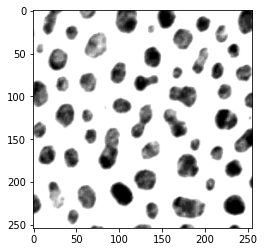

In [11]:
im = pil.Image.open(io.BytesIO(uploaded['blobs.png']))
#im.show()

plt.imshow(im)
plt.show()

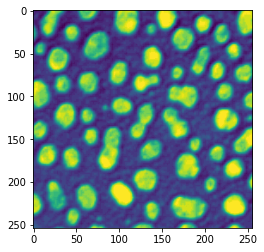

In [12]:
imarray = np. array(im)
plt.imshow(imarray)

In [13]:
#imarray = scaler.fit_transform(imarray)
#print(gha(imarray,5))




In [237]:
#selecting randomly subimages
def sub_images(im,leng=8,times=100000):
  ims=np.zeros((leng,leng,times))
  for _ in range(times):
    i= np.random.randint(len(im)-leng-1)
    j=np.random.randint(len(im)-leng-1)
    for o in range(leng):
      for p in range(leng):
        ims[o,p,_]=im[o+i,p+j]
  return ims

#function for image flattening row1->row2->row3...

def flatten_img(im,times=100000):
  
  vals=np.zeros((len(im)**2,times))
  #print(vals[0,0])
  for _ in range(times):
    f=0
    for j in range(0,len(im)):
      for i in range(0,len(im)):
        vals[f,_]=im[i,j,_]
        f+=1
        #print(f)
  return vals


In [241]:
a=sub_images(imarray)
#print(a.shape)
a=np.array(flatten_img(a))
#print(a.shape)
a=a.T
a= scaler.fit_transform(a)
#a=a.T
print(a.shape)

(100000, 64)


In [242]:
wei=gha(a,10)
wei=np.flip(wei,axis=1)

#print((wei.shape))

In [243]:
print(wei.shape)
print(wei[:,:])

(10, 64)
[[-0.16035966  0.0924245  -0.27132624 -0.02937428 -0.03300381 -0.07607957
  -0.0700095  -0.0388318  -0.02639874 -0.05787544 -0.22444664 -0.1007762
  -0.20683058  0.01161114 -0.2025923  -0.16701974 -0.03503676 -0.21792219
   0.04964842  0.02618982 -0.14991108 -0.23459783 -0.01749031 -0.10117925
  -0.10029641 -0.12424332  0.00837023 -0.19174202  0.0251603  -0.13343345
  -0.07627377 -0.01323237 -0.17839692 -0.12595674 -0.16034594 -0.06114431
  -0.16270415 -0.09119889 -0.08546381 -0.10211584  0.02560586 -0.19545404
  -0.01308563 -0.2278724  -0.12579927 -0.15105737  0.01414276 -0.1667396
  -0.07652868 -0.03706151 -0.13137565  0.00193699 -0.03220555 -0.1367546
  -0.09709029 -0.1162251  -0.10935651 -0.05126032 -0.19146542 -0.07619268
  -0.05573804 -0.02721831 -0.24076397  0.03957036]
 [-0.15855279  0.19816774 -0.3032406   0.0358162   0.03191893 -0.02844189
  -0.02212227  0.01762685  0.03388039 -0.00428738 -0.23159183 -0.05700679
  -0.20346857  0.09929883 -0.20101372 -0.15568753  0.02

100000


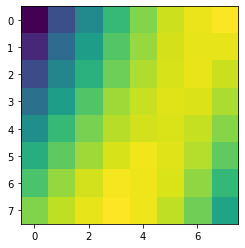

In [244]:
#coefficients algorithm
#to flattened filtro ka9e grammh
#oso pane oi grammes meiwnetai h shmantikothta
#plt.imshow(a)
@njit
def coef(ar,pca,weights,startingi=150,startingj=100):
  v=np.zeros((8,8,pca))
  for number in range(0,pca):
    for i in range(8):
      for j in range(8):
        for q in range(8):
          for p in range(8):
            v[i,j,number]+=weights[number,p+8*q]*ar[p+i+startingi,q+j+startingj]
          #number+=1
  return v
print(len(a))
coefs=coef(imarray,8,wei,26,49)
#coefs
plt.imshow(coefs[:,:,4])
#print(coefs)

In [245]:

def recon_im(weights,coefs,number=0):
  weights=weights.T
  rec_im=np.zeros((8,8))
  for i in range(8):
    for j in range(8):
      for p in range(8):
        for q in range(8):
          rec_im[i,j]+=weights[p+8*q,number]*coefs[i,j,number]
  return rec_im



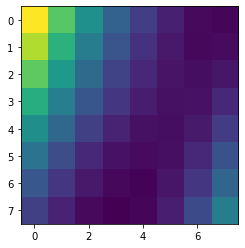

In [246]:
plt.imshow(recon_im(wei,coefs))

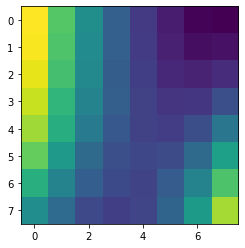

In [247]:
a=np.zeros((8,8))
for _ in range(8):
  a+=normalize(recon_im(wei,coefs,_))

plt.imshow(a)

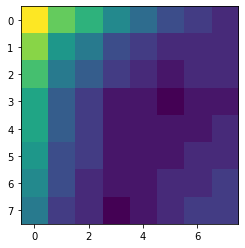

In [251]:
ims=np.zeros((8,8))
  
i= np.random.randint(len(imarray)-8-1)
j=np.random.randint(len(imarray)-8-1)
for o in range(8):
  for p in range(8):
      ims[o,p]=imarray[o+i,p+j]
plt.imshow(ims)

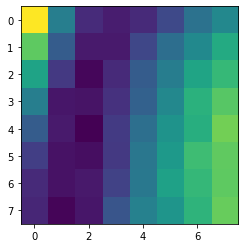

In [252]:

coefs=coef(imarray,10,wei,i,j)
a=np.zeros((8,8))
for _ in range(10):
  a+=normalize(recon_im(wei,coefs,_))

plt.imshow(a)

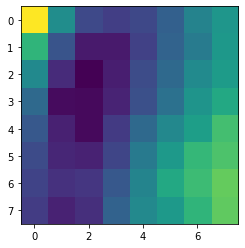

In [253]:
plt.imshow(recon_im(wei,coefs,0))